In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10

In [ ]:
(X_train, _),(_,_) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
X_train = (X_train.astype(np.float32) - 127.5)/ 127.5

In [ ]:
generator = keras.Sequential([
    layers.Dense(256, input_dim=100,activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(32 * 32 * 3, activation='tanh'),
    layers.Reshape((32,32,3))

]
)

In [ ]:
discriminator = keras.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(1024,activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
discriminator.trainable = False
gan_input = keras.Input(shape=(100,))
generated_images = generator(gan_input)
gan_output = discriminator(generated_images)
gan = keras.Model(gan_input, gan_output)

In [ ]:
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
gan.compile(optimizer='adam',loss='binary_crossentropy')

2/2 [==============================] - 0s 35ms/step
Epoch 0, D Loss: 0.7160938382148743, G Loss: 0.6934208869934082


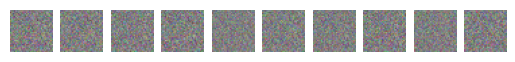

2/2 [==============================] - 0s 23ms/step


In [ ]:
epochs = 100
batch_size = 64

for epoch in range(epochs):
    noise = np.random.normal(0,1,size=(batch_size, 100))
    generated_images = generator.predict(noise)

    idx = np.random.randint(0,X_train.shape[0], batch_size)
    real_images = X_train[idx]

    # Concatenate real and fake images into a single array
    X_combined = np.concatenate([real_images, generated_images])

    # Create labels for the discriminator (1 for real, 0 for fake)
    y_combined = np.concatenate([np.ones((batch_size, 1)), np.zeros((batch_size, 1))])

    # Train the discriminator
    d_loss = discriminator.train_on_batch(X_combined, y_combined)

    # Generate new random noise for the generator
    noise = np.random.normal(0, 1, size=(batch_size, 100))

    # Create labels for the generator (trick the discriminator into predicting 1)
    y_fake = np.ones((batch_size, 1))

    # Train the generator (via the GAN model)
    g_loss = gan.train_on_batch(noise, y_fake)

    # Print progress and save generated images at specific intervals
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, D Loss: {d_loss[0]}, G Loss: {g_loss}")

        # Save generated images
        generated_images = (generated_images + 1) / 2  # Rescale to [0, 1]
        for i in range(10):
            plt.subplot(1, 10, i+1)
            plt.imshow(generated_images[i])
            plt.axis('off')
        plt.show()

In [ ]:
generator.save("generator_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
